**Imports:**

In [217]:
import matplotlib.pyplot as plt
from sympy import symbols, simplify, solve, Eq
import sympy as sm
import numpy as np
import scipy.optimize as opt
import matplotlib.ticker as ticker

# Hotelling’s Linear City Model
Hotelling's Linear City Model, proposed by Harold Hotelling in 1929, is an economic model that describes the geografical location of firms in a city where everything is located on the same street. The model assumes that consumers are uniformly distributed along a linear market and have homogeneous preferences for a single product. Firms, on the other hand, aim to maximize their market share and profits.

In the Linear City Model proposed by Hotelling, a linear transportation cost is incorporated, represented as $t(x-a)$. In this model, firms will ultimately position themselves at the city's center, resulting in minimal product differentiation.

In our model we wish to extent Hotelling's original Linear City Model, by using fixed locations and quadratic transportations costs, where there are two firms that sells the same good, and have exogeneous and fixed locations at $a=b=0$ (the firms in this case will fully differentiate them from each other).
Each firm is defined by its location in the unit interval, where firm 1’s location is $a$, and firm 2’s location is $1-b$, and the common production cost is:

$C(Q_i (p_1,p_2 ))=c(Q_i (p_1,p_2 ))$

The consumers with different locations $x$, are uniformly distributed on the unit interval.
Where $\hat{x}$ is the location where the consumer is indifferent between buying from firm 1 and 2.

The utility of a consumer, located at $x$ if buying from firm 1 is:

$V_1 (x)=r-t(x-a)^2-p_1$

The utility from buying from firm 2 is:

$V_2 (x)=r-t(x-(1-b))^2-p_2$

Where $r$ is the consumers' reservation price, and $t(x-a)^2$ is the function that measures the transportation cost from buying from firm 1, and $t(x-(1-b))^2$ the function that measures the transportation cost from buying from firm 2.

Timing of the game:

* Firms simultaneously chooses their prices
* Each consumer observes the prices and then deciding which firm to buy from.



**We write up the code that illustrates this specific Linear City where the firms are fully differentiated:**

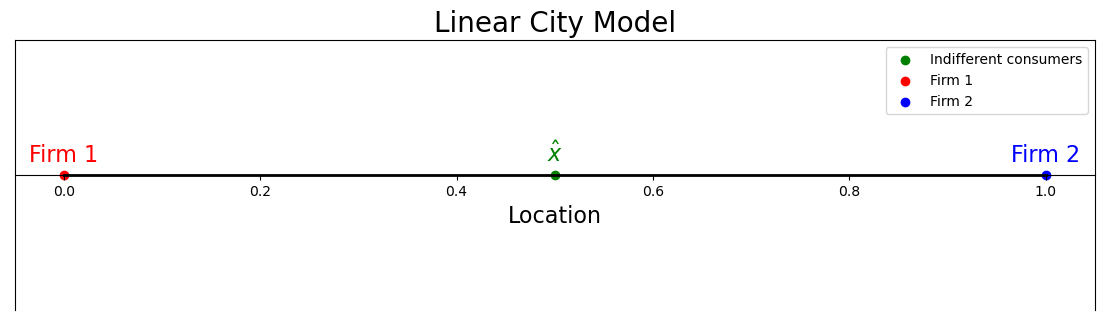

In [218]:
#The linear city:
a = 0.0    # point for firm 1
b = 0.0  # point for firm 2
x = 0.5  # point where the consumer is indifferent between buying from the two firms

# Adjusting the figure size and padding
fig, ax = plt.subplots(figsize=(12, 3), gridspec_kw={'left': 0.1, 'right': 1.0, 'top': 1.0, 'bottom': 0.1})

# Plotting the linear city
x_vals = [0, a, x, 1 - b, 1]
y_vals = [0, 0, 0, 0, 0]  # Setting y-coordinates to zero for all points
ax.plot(x_vals, y_vals, color='black', linewidth=2)

# Marking the new point
ax.scatter(x, 0, color='green', label='Indifferent consumers')
ax.annotate(rf"$\hat{{x}}$", (x, 0), xytext=(x, 0.01), ha='center', color='green', fontsize=16)
ax.scatter(a, 0, color='red', label='Firm 1')
ax.annotate("Firm 1", (a, 0), xytext=(a, 0.01), ha='center', color='red', fontsize=16)
ax.scatter(1 - b, 0, color='blue', label='Firm 2')
ax.annotate("Firm 2", (1 - b, 0), xytext=(1 - b, 0.01), ha='center', color='blue', fontsize=16)

# Setting plot properties
ax.set_xlabel('Location', fontsize=16)
ax.set_title('Linear City Model', fontsize=20)
ax.legend()

# Removing the y-axis ticks and labels
ax.yaxis.set_ticks([])

# Adjusting the y-limits
ax.set_ylim(-0.1, 0.1)

# Moving the x-axis up
ax.spines['bottom'].set_position(('data', 0.0))

# Display the plot
plt.show()


**Now we wish to solve the equilibrium prices, calculate the price marginal cost margin $(p-MC)$, and the firms’ equilibrium profits, and thereafter investigate what happens when $t→0$.**

We solve the game by backwards induction, where we start solving the consumers problem such that we find the demand functions for firm 1 and 2.

* Stage 2:

We find the case where the consumers are indifferent between buying from firm 1 and 2, which is at the location $\hat{x}$, where this is where $V_1=V_2$. We solve for $\hat{x}$:


In [219]:
# Define the variables and parameters
x = sm.symbols('x')
r, t, p_1, p_2 = sm.symbols('r t p_1 p_2')

# Define the utility functions
V_1 = r - t * x**2 - p_1
V_2 = r - t * (x - 1)**2 - p_2

# Set V_1 equal to V_2 and solve for x
equation = sm.Eq(V_1, V_2)
solution = sm.solve(equation, x)

x_hat = solution[0]  # Get the first solution

# Print the result
print("The location where consumers are indifferent is:")
x_hat

The location where consumers are indifferent is:


(-p_1 + p_2 + t)/(2*t)

In [220]:
print(f"Demand for firm 1 is hereby:")
x_hat

Demand for firm 1 is hereby:


(-p_1 + p_2 + t)/(2*t)

In [221]:
print(f"Demand for firm 2 is hereby:")
1-x_hat

Demand for firm 2 is hereby:


1 - (-p_1 + p_2 + t)/(2*t)

* Stage 1:

We find the optimal price, and thereby the optimal profit

In [222]:
# Define the variables and parameters
p_1, p_2, r, t, c = sm.symbols('p_1 p_2 r t c')

# Define the demand functions
demand_1 = x_hat
demand_2 = 1 - x_hat

# Calculate the revenue for firm 1 and firm 2
revenue_1 = demand_1 * p_1
revenue_2 = demand_2 * p_2

# Calculate the cost for firm 1 and firm 2
cost_1 = c * demand_1
cost_2 = c * demand_2

# Calculate the profit for firm 1 and firm 2
profit_1 = sm.simplify(revenue_1 - cost_1)
profit_2 = sm.simplify(revenue_2 - cost_2)

# Differentiate the profit function with respect to the price
derivative = profit_1.diff(p_1)

# Solve for the optimal price (we apply symmetry, as the profit functions are symmetric, hereby p_1=p_2)
optimal_p = sm.solve(derivative.subs(p_2, p_1), p_1)  # Substitute p_2 with p_1

# Calculate the marginal cost
MC = sm.simplify(2 * c * demand_1.subs([(p_1, optimal_p[0]), (p_2, optimal_p[0])]))

# Calculate the price-marginal cost margin, p*-MC
price_margin_cost_margin = optimal_p[0] - MC

# Substitute the optimal price into profit functions
optimal_profit_1 = simplify(profit_1.subs([(p_1, optimal_p[0]), (p_2, optimal_p[0])]))

In [223]:
# Print the profit functions for firm 1
print("Profit function for firm 1:")
profit_1

Profit function for firm 1:


(-c + p_1)*(-p_1 + p_2 + t)/(2*t)

In [224]:
# Print the profit functions for firm 2
print("\nProfit function for firm 2:")
profit_2


Profit function for firm 2:


(-c + p_2)*(p_1 - p_2 + t)/(2*t)

In [225]:
# Print the optimal price
print("\nOptimal price for both firms:")
optimal_p


Optimal price for both firms:


[c + t]

In [226]:
# Print the marginal cost
print("\nMarginal Cost (MC):")
MC


Marginal Cost (MC):


c

In [227]:
# Print the price-marginal cost margin
print("\nPrice-marginal cost margin:")
price_margin_cost_margin


Price-marginal cost margin:


t

In [228]:
# Print the optimal profit
print("\nOptimal profit for firm 1:")
optimal_profit_1


Optimal profit for firm 1:


t/2

* We find that when $t→0$, will $p^*-MC=0$, which is because $p^*=MC$ which means that the firms no longer have any market power.
The reason for this is, that the consumers now have no transportation cost, and can freely choose the firm with the lowest price which makes the firms to compete against each other by undercutting the firm’s price.

* In addition we find that when $t→0$ will $π^*=0$ which is the case where we end up in the Bertrand model, where the firms undercut each other until their prices are equal to their marginal cost.



**We can also obtain a numerical solution to the model using the following code:**

We still assume that the firms are fully differentiated, and therefore located at a=b=0.

In [229]:
# We define demand functions for each firm
def demand1(t, p1, p2):
    if t == 0:
        return p1
    return (-p1 + p2 + t) / (2 * t)

def demand2(t, p1, p2):
    if t == 0:
        return p2
    return 1 - (-p1 + p2 + t) / (2 * t)

# Define profit functions as prices minus cost multiplied by the demand
# firm 1
def profit1(t, p1, p2, c):
    demand = demand1(t, p1, p2)
    if np.isnan(demand):
        return np.nan
    return p1 * demand - c * demand

# firm 2
def profit2(t, p1, p2, c):
    demand = demand2(t, p1, p2)
    if np.isnan(demand):
        return np.nan
    return p2 * demand - c * demand

# Set objective function
def obj(params, t, c):
    p1, p2 = params
    target_profit = t / 2  # Adjust the target profit based on t
    profit_1 = profit1(t, p1, p2, c)
    profit_2 = profit2(t, p1, p2, c)
    if np.isnan(profit_1) or np.isnan(profit_2):
        return np.nan
    return (profit_1 - target_profit)**2 + (profit_2 - target_profit)**2

# Assume parameter values
t_values = np.linspace(0, 3, 100)  # Range of t values
c = 2

# Initialize arrays to store profits and prices
pi1_values = np.zeros_like(t_values)
pi2_values = np.zeros_like(t_values)
p1_values = np.zeros_like(t_values)
p2_values = np.zeros_like(t_values)

# Set the initial guesses for p1 and p2
p1 = 3
p2 = 3

# Find Nash equilibrium in prices for each t
for i, t in enumerate(t_values):
    # Find Nash equilibrium for current t
    res = opt.minimize(obj, [p1, p2], args=(t, c), method="L-BFGS-B", bounds=[(0, None), (0, None)], tol=1e-8)
    p1_opt, p2_opt = res.x

    # Calculate profits at Nash equilibrium for current t
    pi1_opt = profit1(t, p1_opt, p2_opt, c)
    pi2_opt = profit2(t, p1_opt, p2_opt, c)

    # Store profits and prices
    pi1_values[i] = pi1_opt
    pi2_values[i] = pi2_opt
    p1_values[i] = p1_opt
    p2_values[i] = p2_opt

# Print results
print(f"Firm 1: profit = {pi1_opt:.2f}, price = {p1_opt:.2f}, for c=2 and t=3")
print(f"Firm 2: profit = {pi2_opt:.2f}, price = {p2_opt:.2f}, for c=2 and t=3")

Firm 1: profit = 1.50, price = 5.00, for c=2 and t=3
Firm 2: profit = 1.50, price = 5.00, for c=2 and t=3


In the analytical part, we found that the optimal profit is given by: $\frac{t}{2}$ and the optimal price for both firms is: $c+t$, which is consistent with the analytical results.

**We plot the results with respect to the transportation cost:**

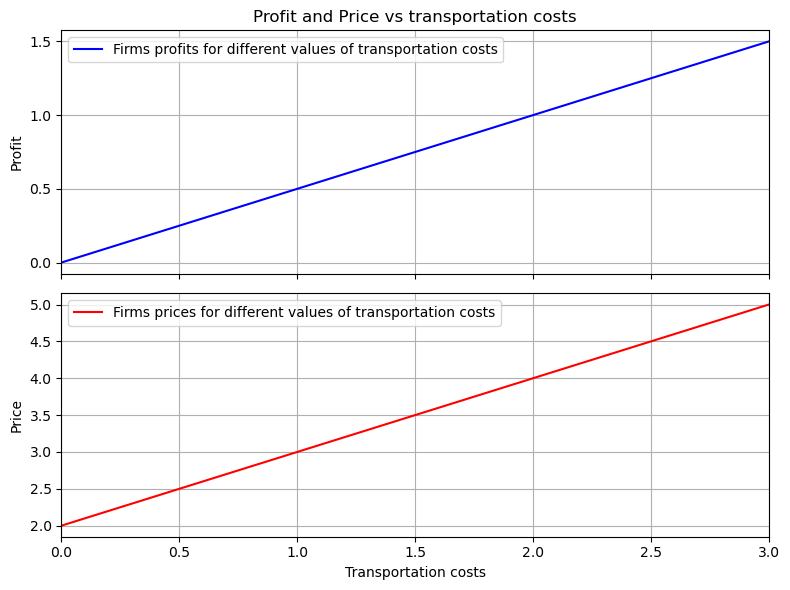

In [230]:
# Plot results
fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True, figsize=(8, 6))  # Adjust figure size

# Plot profit
ax1.plot(t_values, pi1_values, label="Firms profits for different values of transportation costs", color="blue")
ax1.set_ylabel('Profit')
ax1.set_title('Profit and Price vs transportation costs')
ax1.yaxis.set_major_locator(ticker.MultipleLocator(0.5))  # Set y-axis interval to 0.5
ax1.legend()
ax1.grid(True)

# Plot price
ax2.plot(t_values, p1_values, label="Firms prices for different values of transportation costs", color="red")
ax2.set_xlabel('Transportation costs')
ax2.set_ylabel('Price')
ax2.yaxis.set_major_locator(ticker.MultipleLocator(0.5))  # Set y-axis interval to 0.5
ax2.legend()
ax2.grid(True)

plt.xlim(0.0, 3)
plt.tight_layout()
plt.show()


**Conclusion**

This approach produces comparable results to those obtained through the analytical approach. Where the firms gain market power when the transportation cost increases, and loses market power when the transportation cost decreases.